# 데이터 불러오기

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/NLP_분류_물리_화학_생물학/"    

train_df = pd.read_csv(base_path + "train.csv", encoding="utf-8" )
test_df = pd.read_csv(base_path + "test.csv",  encoding="utf-8")
# submission = pd.read_csv(base_path + "sample_submission.csv",  encoding="utf-8")

# EDA

In [48]:
train_df

Id                                            Comment      Topic
0      0x840  A few things. You might have negative- frequen...    Biology
1      0xbf0  Is it so hard to believe that there exist part...    Physics
2     0x1dfc                                     There are bees    Biology
3      0xc7e  I'm a medication technician. And that's alot o...    Biology
4      0xbba                     Cesium is such a pretty metal.  Chemistry
...      ...                                                ...        ...
8690  0x1e02  I make similar observations over the last week...    Biology
8691   0xc8d                                    You would know.    Biology
8692   0x723            Also use the correct number of sig figs  Chemistry
8693   0x667  What about the ethical delimmas,  groundbreaki...    Biology
8694  0x1476                          I would like to know too.    Biology

[8695 rows x 3 columns]

In [49]:
test_df

Id                                            Comment      Topic
0     0x1aa9  Personally I have no idea what my IQ is. I’ve ...    Biology
1      0x25e  I'm skeptical. A heavier lid would be needed t...    Physics
2     0x1248  I think I have 100 cm of books on the subject....    Biology
3      0x2b9  Is chemistry hard in uni. Ive read somewhere t...  Chemistry
4     0x24af  In addition to the other comment, you can crit...    Physics
...      ...                                                ...        ...
1581  0x22bf  I’m not really denying your intent. I’m a) dou...  Chemistry
1582  0x1f4a  i really empathize with your compassion for bu...    Biology
1583  0x27b7  If you want to keep it for more than 2 weeks, ...  Chemistry
1584  0x2066  Same here. I’m in nursing school so I only hav...    Biology
1585   0x6d6  The video basically says read a pop-sci book a...    Physics

[1586 rows x 3 columns]

# 결측치 제거

결과: 결측치 없음

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB


In [59]:
train_df.isna().sum() #Check for null values

Id         0
Comment    0
Topic      0
dtype: int64

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1586 non-null   object
 1   Comment  1586 non-null   object
 2   Topic    1586 non-null   object
dtypes: object(3)
memory usage: 37.3+ KB


# 중복 제거

결과: 중복 없음

In [25]:
# 중복확인
train_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8690    False
8691    False
8692    False
8693    False
8694    False
Length: 8695, dtype: bool

In [60]:
train_df.duplicated().sum() #check for the duplicated rows

0

In [32]:
# 중복제거
train_df = train_df.drop_duplicates(subset=["Id", "Comment"])

Id                                            Comment      Topic
0      0x840  A few things. You might have negative- frequen...    Biology
1      0xbf0  Is it so hard to believe that there exist part...    Physics
2     0x1dfc                                     There are bees    Biology
3      0xc7e  I'm a medication technician. And that's alot o...    Biology
4      0xbba                     Cesium is such a pretty metal.  Chemistry
...      ...                                                ...        ...
8690  0x1e02  I make similar observations over the last week...    Biology
8691   0xc8d                                    You would know.    Biology
8692   0x723            Also use the correct number of sig figs  Chemistry
8693   0x667  What about the ethical delimmas,  groundbreaki...    Biology
8694  0x1476                          I would like to know too.    Biology

[8695 rows x 3 columns]

In [44]:
train_df.head(10).style.set_properties(**{"background-color": "#63B4B8","color": "black","border-color": "black"})  # **의 의미가 뭘까?

In [83]:
train_df.tail(10).style.set_properties(**{"background-color": "#63B4B8","color": "black","border-color": "black"})

# 데이터 전처리

In [50]:
train_df.dtypes #check the datatypes of dataset

Id         object
Comment    object
Topic      object
dtype: object

In [51]:
train_df['Topic'].value_counts() #Different types of value in "Topic" column

Biology      3591
Chemistry    2920
Physics      2184
Name: Topic, dtype: int64

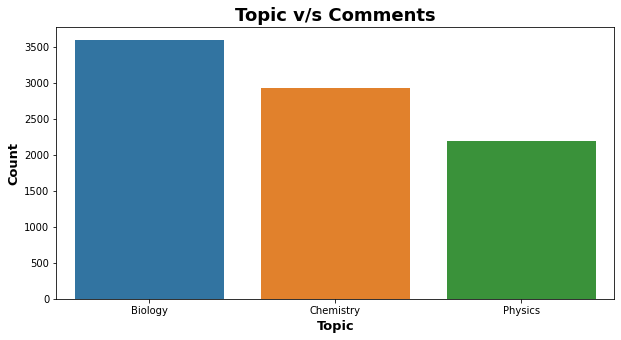

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x = train_df['Topic'], order = train_df["Topic"].value_counts().index)
plt.title("Topic v/s Comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("Topic",fontsize = 13,fontweight = 'bold')
plt.ylabel("Count",fontsize=13,fontweight = 'bold')
plt.show()

In [62]:
words_per_comments_train_df = train_df.Comment.map(lambda x : len(x.split()))

In [63]:
words_per_comments_train_df

0       254
1        37
2         3
3        33
4         6
       ... 
8690     49
8691      3
8692      8
8693     64
8694      6
Name: Comment, Length: 8695, dtype: int64

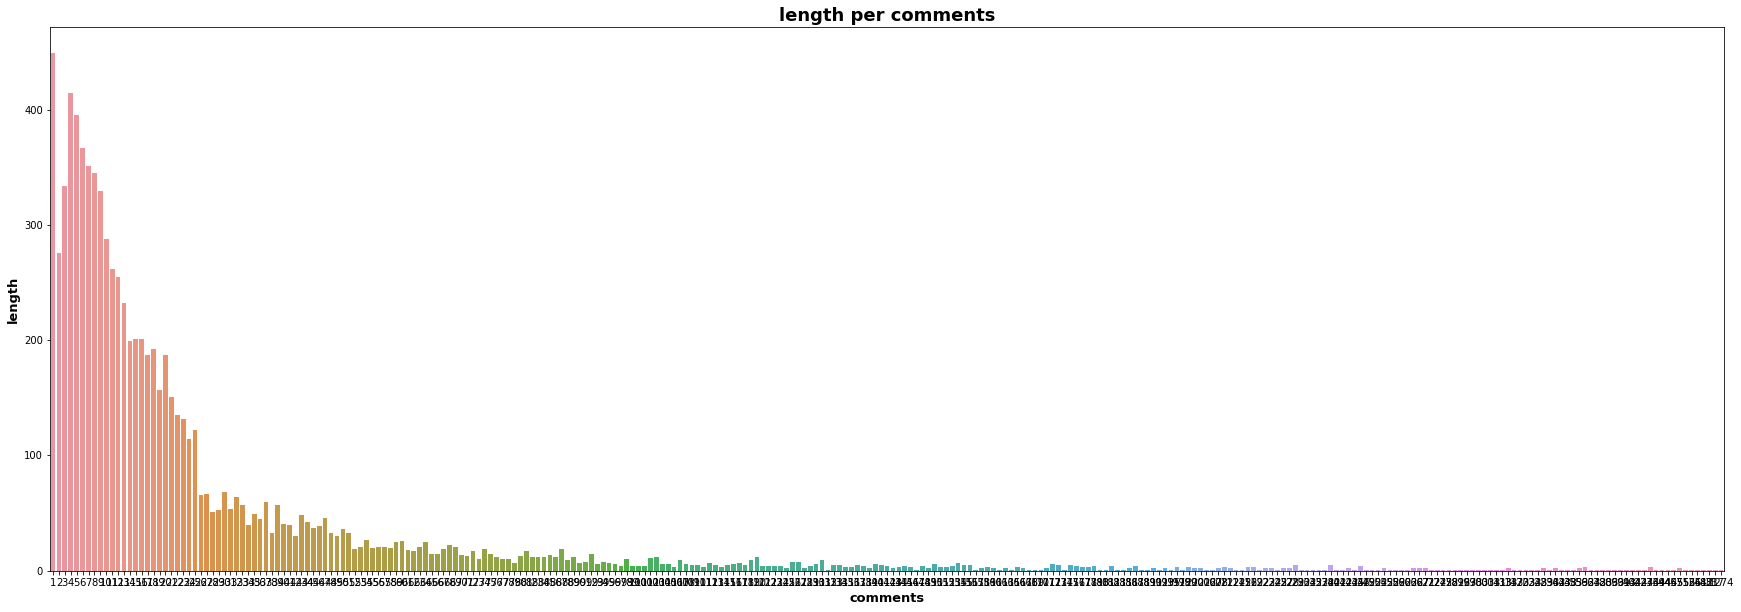

In [70]:
plt.figure(figsize=(30,10))
sns.countplot(x = words_per_comments_train_df)
plt.title("length per comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("comments",fontsize = 13,fontweight = 'bold')
plt.ylabel("length",fontsize=13,fontweight = 'bold')
plt.show()

<ipython-input-71-19b4a8867e91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(words_per_comments_train)


Text(0.5, 0, 'Word count')

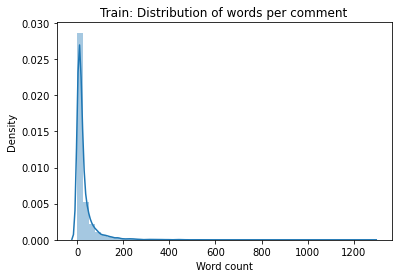

In [71]:
sns.distplot(words_per_comments_train)
plt.title("Train: Distribution of words per comment")
plt.xlabel("Word count")

In [72]:
min(words_per_comments_train),max(words_per_comments_train)

(1, 1274)

In [75]:
words_per_comments_test_df = test_df.Comment.map(lambda x : len(x.split()))

In [76]:
words_per_comments_test_df

0        52
1        34
2       148
3        34
4        58
       ... 
1581    186
1582     49
1583     60
1584     37
1585     33
Name: Comment, Length: 1586, dtype: int64

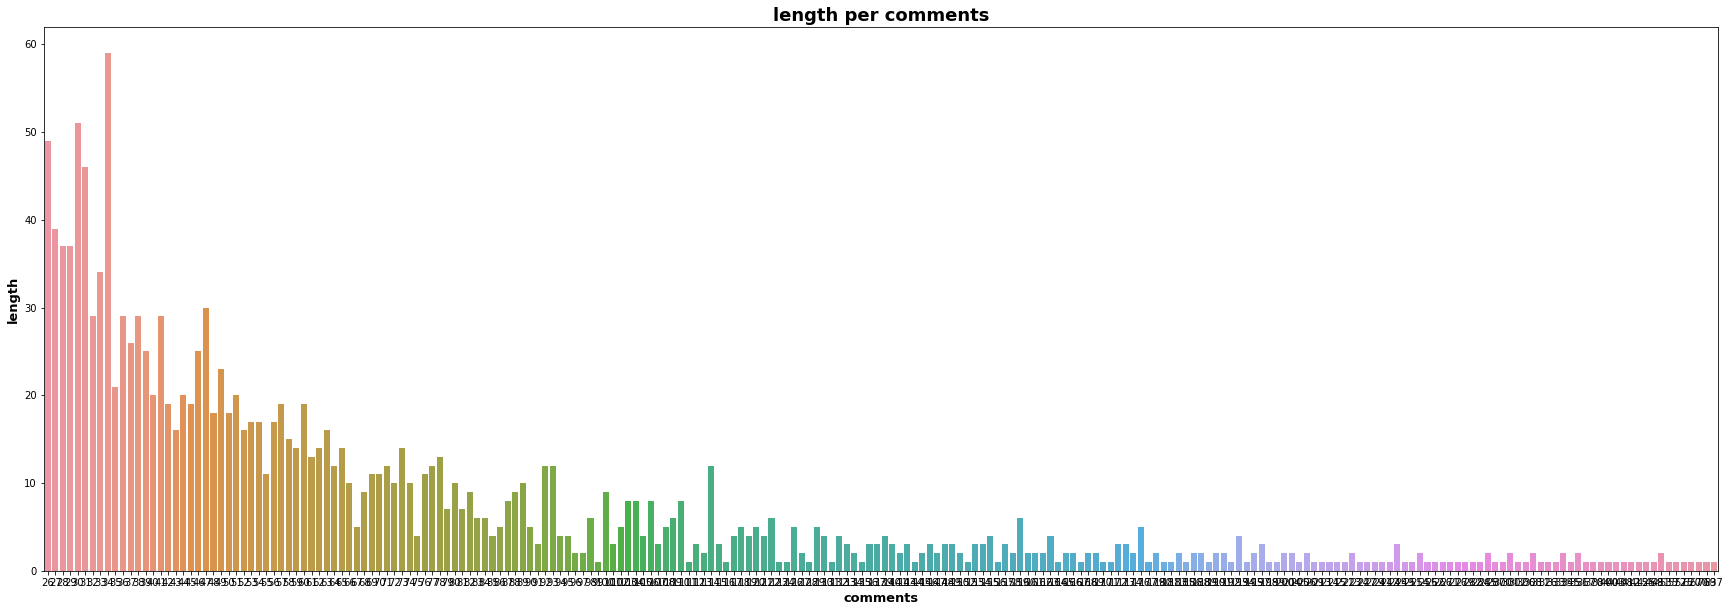

In [77]:
plt.figure(figsize=(30,10))
sns.countplot(x = words_per_comments_test_df)
plt.title("length per comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("comments",fontsize = 13,fontweight = 'bold')
plt.ylabel("length",fontsize=13,fontweight = 'bold')
plt.show()

<ipython-input-78-effcdcbf6dd5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(words_per_comments_test_df)


Text(0.5, 0, 'Word count')

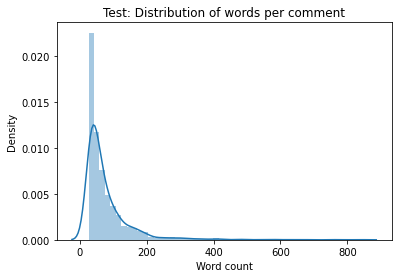

In [78]:
sns.distplot(words_per_comments_test_df)
plt.title("Test: Distribution of words per comment")
plt.xlabel("Word count")

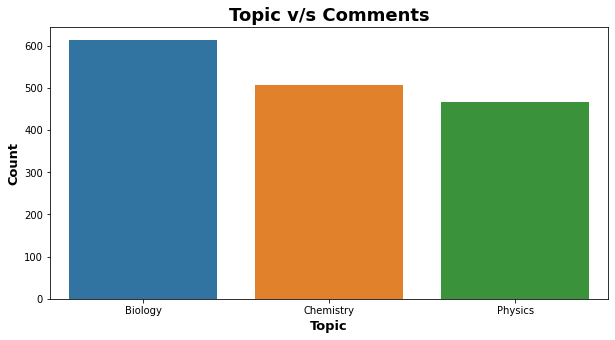

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x = test_df['Topic'], order = train_df["Topic"].value_counts().index)
plt.title("Topic v/s Comments",fontsize = 18,fontweight = 'bold')
plt.xlabel("Topic",fontsize = 13,fontweight = 'bold')
plt.ylabel("Count",fontsize=13,fontweight = 'bold')
plt.show()

# 머신러닝 모델

In [84]:
# 머신러닝 모델
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [86]:
# Create the vectorizer 
tfi_df = TfidfVectorizer(stop_words='english')

# fit the vectorizer on train data
tfi_df.fit(train_df.Comment)

TfidfVectorizer(stop_words='english')

훈련 데이터 학습

In [87]:
features = tfi_df.transform(train_df.Comment).toarray()
features.shape

(8695, 17888)

In [88]:
label = train_df.Topic 

In [89]:
clf = MultinomialNB()

In [95]:
clf = clf.fit(features, label)

In [96]:
test_actual = test_df.Topic

In [97]:
test_features = tfi_df.transform(test_df.Comment).toarray()
test_features.shape

(1586, 17888)

테스트 데이터 실햄

In [99]:
test_prediction = clf.predict(test_features)

In [100]:
test_score = 100*(metrics.accuracy_score(test_actual , test_prediction ))

print(test_score)

81.84110970996217


여기까지 기본적인 머신러닝 실습 연습